### Exploratory Data Analysis for Bike Share Data

**Imports**

In [810]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")
import matplotlib as plt

import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [811]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train['id'] = 0

df_test['count'] = 0
df_test['id'] = 1

df_train = df_train.drop('casual', axis = 1)
df_train = df_train.drop('registered', axis = 1)

In [812]:
datetime_test = df_test.datetime

In [813]:
dataframes = [df_train, df_test]
df = pd.concat(dataframes)

**General data Info**

In [814]:
df.shape

(17379, 11)

In [815]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,id
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0


We see that all of the variables are numeric except for the datetime column which is datatime object. We can parse this column and create new columns for the year, month, day and time. 

In [816]:
# no missing variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 11 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
count         17379 non-null int64
id            17379 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.6+ MB


**Handling datetime**

In [817]:
df['date'] = df.datetime.apply(lambda x: x.split()[0])

The time only gives the hour of the day (0-24), so we can remove the colon notation and just leave the hour number. 

In [818]:
df['time'] = df.datetime.apply(lambda x: int(x.split()[1].split(":")[0]))

In [819]:
df['year'] = df.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
df['month'] = df.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
df['day'] = df.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').day)
df['weekday'] = df.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())

Add a feature for normal vs. odd hours

In [820]:
df['Odd_hours'] = np.where((df.time >=0) & (df.time <=6), 1,0)

Next we want to change some of the nominal variables to be categories so that they do not get misinterpreted as ordinal

In [821]:
# nominal_variables = ["time","weekday","month","season","weather","holiday","workingday"]
# for var in nominal_variables:
#     df_train[var] = df_train[var].astype("category")

In [822]:
time_d = pd.DataFrame(pd.get_dummies(list(df.time), prefix = 'time_'))
weekday_d = pd.DataFrame(pd.get_dummies(list(df.weekday), prefix='weekday_'))
month_d = pd.DataFrame(pd.get_dummies(list(df.month), prefix='month_'))
season_d = pd.DataFrame(pd.get_dummies(list(df.season), prefix='season_'))
weather_d = pd.DataFrame(pd.get_dummies(list(df.weather), prefix='weather_'))

In [823]:
with_dummies = [weather_d, month_d, time_d, season_d, weekday_d]
df = df.join(with_dummies)

**Summary Statistics**

In [824]:
df['count'].describe()

count    17379.000000
mean       119.999770
std        170.711941
min          0.000000
25%          0.000000
50%         28.000000
75%        192.000000
max        977.000000
Name: count, dtype: float64

In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23872 entries, 0 to 17378
Data columns (total 69 columns):
datetime      17379 non-null object
season        17379 non-null float64
holiday       17379 non-null float64
workingday    17379 non-null float64
weather       17379 non-null float64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
count         17379 non-null float64
id            17379 non-null float64
date          17379 non-null object
time          17379 non-null float64
year          17379 non-null float64
month         17379 non-null float64
day           17379 non-null float64
weekday       17379 non-null float64
Odd_hours     17379 non-null float64
weather__1    23872 non-null uint8
weather__2    23872 non-null uint8
weather__3    23872 non-null uint8
weather__4    23872 non-null uint8
month__1      23872 non-null uint8
month__2      23872 non-null uint8
month__3      238

In [826]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'id', 'date', 'time', 'year',
       'month', 'day', 'weekday', 'Odd_hours', 'weather__1', 'weather__2',
       'weather__3', 'weather__4', 'month__1', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'time__0', 'time__1', 'time__2',
       'time__3', 'time__4', 'time__5', 'time__6', 'time__7', 'time__8',
       'time__9', 'time__10', 'time__11', 'time__12', 'time__13', 'time__14',
       'time__15', 'time__16', 'time__17', 'time__18', 'time__19', 'time__20',
       'time__21', 'time__22', 'time__23', 'season__1', 'season__2',
       'season__3', 'season__4', 'weekday__0', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

Since temp and atemp are so highly correlated, we can drop temp from the data set. 

**Helper Functions**

In [513]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

**Remove cols**

In [677]:
df_train = df[df['id'] == 0]
df_test = df[df['id'] == 1]

df_test = df_test.drop('count', axis=1)

In [678]:
X = df_train.drop('count', axis=1)
y = df_train['count']

**Simple Regression - Base Model**

In [600]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [610]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [611]:
preds = reg.predict(X_test)

In [612]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, preds)

10682.597730606103

Because linear regression can predict negative values, we cannot calcualte the RMLSE for the predictions, and this is thus not a valid method.

**Random Forest Regression**

In [613]:
from sklearn.ensemble import RandomForestRegressor

In [614]:
rf = RandomForestRegressor()

params = {
    'bootstrap': True,
     'max_depth': 70,
     'max_features': 'auto',
     'min_samples_leaf': 4,
     'min_samples_split': 10,
     'n_estimators': 400}

rf_model = rf.fit(X_train,y_train)

In [615]:
preds = rf_model.predict(X_test)
rmsle(preds, y_test)

0.43017201288449736

**XGBoost**

In [478]:
def eval_rmsle(preds, dtrain):
    labels = dtrain.get_label()
    return 'rmsle', float(np.sqrt(mean_squared_log_error(preds, labels)))

In [753]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

def run_xgb(param):
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dval = xgb.DMatrix(X_val, y_val)
    dtest = xgb.DMatrix(X_test, y_test)
    
    num_round = 5000
    watchlist = [(dval, 'eval'), (dtrain, 'train')]
    evals_result = {}

    bst = xgb.train(param, dtrain, num_round, evals=watchlist, early_stopping_rounds=10, 
                    evals_result=evals_result, feval=eval_rmsle)


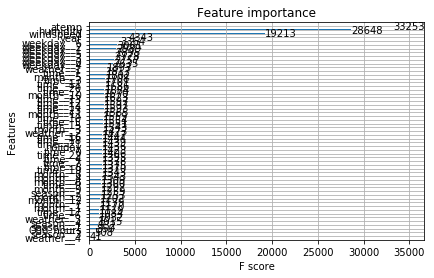

In [642]:
xgb.plot_importance(bst)

In [244]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf = rf.fit(X_train, y_train)
preds = rf.predict(X_test)


In [245]:
rmsle(preds, y_test)

0.5461180047713476

**Run Model**

In [830]:
feature_selector = [
    
    'id',
    'count',
    
    'atemp', 
    'windspeed',
    'humidity',
    'weather',
    
    'season__1',
    'season__2',
    'season__3',
    'season__4'

    
]

In [828]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'id', 'date', 'time', 'year',
       'month', 'day', 'weekday', 'Odd_hours', 'weather__1', 'weather__2',
       'weather__3', 'weather__4', 'month__1', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'time__0', 'time__1', 'time__2',
       'time__3', 'time__4', 'time__5', 'time__6', 'time__7', 'time__8',
       'time__9', 'time__10', 'time__11', 'time__12', 'time__13', 'time__14',
       'time__15', 'time__16', 'time__17', 'time__18', 'time__19', 'time__20',
       'time__21', 'time__22', 'time__23', 'season__1', 'season__2',
       'season__3', 'season__4', 'weekday__0', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [831]:
my_df = df[feature_selector]

df_train = my_df[my_df['id'] == 0]
df_test = my_df[my_df['id'] == 1]

df_test = df_test.drop('count', axis=1)

In [832]:
param = {
    'silent':1, 
    'objective':'count:poisson', 
}

run_xgb(param)

[0]	eval-poisson-nloglik:971.33	train-poisson-nloglik:990.434	eval-rmsle:4.30693	train-rmsle:4.35199
Multiple eval metrics have been passed: 'train-rmsle' will be used for early stopping.

Will train until train-rmsle hasn't improved in 10 rounds.
[1]	eval-poisson-nloglik:932.159	train-poisson-nloglik:950.452	eval-rmsle:4.22657	train-rmsle:4.27128
[2]	eval-poisson-nloglik:893.022	train-poisson-nloglik:910.505	eval-rmsle:4.13629	train-rmsle:4.18059
[3]	eval-poisson-nloglik:853.926	train-poisson-nloglik:870.599	eval-rmsle:4.03602	train-rmsle:4.07983
[4]	eval-poisson-nloglik:814.882	train-poisson-nloglik:830.744	eval-rmsle:3.92593	train-rmsle:3.96916
[5]	eval-poisson-nloglik:775.901	train-poisson-nloglik:790.952	eval-rmsle:3.80645	train-rmsle:3.84902
[6]	eval-poisson-nloglik:736.998	train-poisson-nloglik:751.238	eval-rmsle:3.67825	train-rmsle:3.72004
[7]	eval-poisson-nloglik:698.191	train-poisson-nloglik:711.621	eval-rmsle:3.54216	train-rmsle:3.58305
[8]	eval-poisson-nloglik:659.503	train

[78]	eval-poisson-nloglik:32.0582	train-poisson-nloglik:22.8786	eval-rmsle:0.819024	train-rmsle:0.720329
[79]	eval-poisson-nloglik:32.0781	train-poisson-nloglik:22.7925	eval-rmsle:0.818952	train-rmsle:0.719201
[80]	eval-poisson-nloglik:32.089	train-poisson-nloglik:22.756	eval-rmsle:0.819068	train-rmsle:0.7188
[81]	eval-poisson-nloglik:32.0996	train-poisson-nloglik:22.6856	eval-rmsle:0.819155	train-rmsle:0.71856
[82]	eval-poisson-nloglik:32.1751	train-poisson-nloglik:22.5596	eval-rmsle:0.819467	train-rmsle:0.717404
[83]	eval-poisson-nloglik:32.1633	train-poisson-nloglik:22.5169	eval-rmsle:0.81913	train-rmsle:0.716844
[84]	eval-poisson-nloglik:32.1751	train-poisson-nloglik:22.4425	eval-rmsle:0.819024	train-rmsle:0.714274
[85]	eval-poisson-nloglik:32.1839	train-poisson-nloglik:22.3932	eval-rmsle:0.818948	train-rmsle:0.713889
[86]	eval-poisson-nloglik:32.1877	train-poisson-nloglik:22.3674	eval-rmsle:0.818831	train-rmsle:0.713552
[87]	eval-poisson-nloglik:32.1619	train-poisson-nloglik:22.22

[156]	eval-poisson-nloglik:33.2585	train-poisson-nloglik:18.3417	eval-rmsle:0.820131	train-rmsle:0.667117
[157]	eval-poisson-nloglik:33.2545	train-poisson-nloglik:18.3099	eval-rmsle:0.819915	train-rmsle:0.666874
[158]	eval-poisson-nloglik:33.2631	train-poisson-nloglik:18.3065	eval-rmsle:0.819892	train-rmsle:0.666881
[159]	eval-poisson-nloglik:33.2911	train-poisson-nloglik:18.2689	eval-rmsle:0.819719	train-rmsle:0.665721
[160]	eval-poisson-nloglik:33.3016	train-poisson-nloglik:18.2669	eval-rmsle:0.819908	train-rmsle:0.665595
[161]	eval-poisson-nloglik:33.3567	train-poisson-nloglik:18.2373	eval-rmsle:0.820186	train-rmsle:0.664664
[162]	eval-poisson-nloglik:33.3847	train-poisson-nloglik:18.2135	eval-rmsle:0.820338	train-rmsle:0.664031
[163]	eval-poisson-nloglik:33.3934	train-poisson-nloglik:18.1728	eval-rmsle:0.820221	train-rmsle:0.663612
[164]	eval-poisson-nloglik:33.4187	train-poisson-nloglik:18.1474	eval-rmsle:0.820307	train-rmsle:0.6632
[165]	eval-poisson-nloglik:33.4222	train-poisson

[234]	eval-poisson-nloglik:34.1476	train-poisson-nloglik:15.3666	eval-rmsle:0.823924	train-rmsle:0.623686
[235]	eval-poisson-nloglik:34.1435	train-poisson-nloglik:15.3448	eval-rmsle:0.823876	train-rmsle:0.6229
[236]	eval-poisson-nloglik:34.1392	train-poisson-nloglik:15.3422	eval-rmsle:0.823838	train-rmsle:0.62287
[237]	eval-poisson-nloglik:34.1347	train-poisson-nloglik:15.3147	eval-rmsle:0.823754	train-rmsle:0.622379
[238]	eval-poisson-nloglik:34.1485	train-poisson-nloglik:15.2584	eval-rmsle:0.823981	train-rmsle:0.62112
[239]	eval-poisson-nloglik:34.1376	train-poisson-nloglik:15.2419	eval-rmsle:0.823942	train-rmsle:0.620961
[240]	eval-poisson-nloglik:34.1448	train-poisson-nloglik:15.2198	eval-rmsle:0.823831	train-rmsle:0.620678
[241]	eval-poisson-nloglik:34.0815	train-poisson-nloglik:15.1587	eval-rmsle:0.82311	train-rmsle:0.619745
[242]	eval-poisson-nloglik:34.0956	train-poisson-nloglik:15.1033	eval-rmsle:0.823312	train-rmsle:0.619136
[243]	eval-poisson-nloglik:34.105	train-poisson-nlo

[312]	eval-poisson-nloglik:35.1275	train-poisson-nloglik:13.3036	eval-rmsle:0.82796	train-rmsle:0.589497
[313]	eval-poisson-nloglik:35.1165	train-poisson-nloglik:13.275	eval-rmsle:0.82769	train-rmsle:0.588876
[314]	eval-poisson-nloglik:35.129	train-poisson-nloglik:13.259	eval-rmsle:0.82798	train-rmsle:0.588501
[315]	eval-poisson-nloglik:35.1218	train-poisson-nloglik:13.2384	eval-rmsle:0.827953	train-rmsle:0.588092
[316]	eval-poisson-nloglik:35.1653	train-poisson-nloglik:13.218	eval-rmsle:0.828285	train-rmsle:0.587287
[317]	eval-poisson-nloglik:35.1799	train-poisson-nloglik:13.205	eval-rmsle:0.828462	train-rmsle:0.58693
[318]	eval-poisson-nloglik:35.1958	train-poisson-nloglik:13.176	eval-rmsle:0.828598	train-rmsle:0.58538
[319]	eval-poisson-nloglik:35.2144	train-poisson-nloglik:13.1343	eval-rmsle:0.828556	train-rmsle:0.584397
[320]	eval-poisson-nloglik:35.2071	train-poisson-nloglik:13.0994	eval-rmsle:0.828492	train-rmsle:0.583987
[321]	eval-poisson-nloglik:35.2083	train-poisson-nloglik:

[390]	eval-poisson-nloglik:36.1308	train-poisson-nloglik:11.9369	eval-rmsle:0.832457	train-rmsle:0.561668
[391]	eval-poisson-nloglik:36.1796	train-poisson-nloglik:11.9168	eval-rmsle:0.832765	train-rmsle:0.561047
[392]	eval-poisson-nloglik:36.2069	train-poisson-nloglik:11.8915	eval-rmsle:0.832916	train-rmsle:0.560412
[393]	eval-poisson-nloglik:36.2497	train-poisson-nloglik:11.8755	eval-rmsle:0.833068	train-rmsle:0.559823
[394]	eval-poisson-nloglik:36.2687	train-poisson-nloglik:11.8508	eval-rmsle:0.833106	train-rmsle:0.559062
[395]	eval-poisson-nloglik:36.275	train-poisson-nloglik:11.8345	eval-rmsle:0.832944	train-rmsle:0.558692
[396]	eval-poisson-nloglik:36.3212	train-poisson-nloglik:11.8182	eval-rmsle:0.833236	train-rmsle:0.558245
[397]	eval-poisson-nloglik:36.36	train-poisson-nloglik:11.7961	eval-rmsle:0.833361	train-rmsle:0.557553
[398]	eval-poisson-nloglik:36.3814	train-poisson-nloglik:11.7659	eval-rmsle:0.833551	train-rmsle:0.556562
[399]	eval-poisson-nloglik:36.4079	train-poisson-

[468]	eval-poisson-nloglik:37.0775	train-poisson-nloglik:10.8079	eval-rmsle:0.835019	train-rmsle:0.535219
[469]	eval-poisson-nloglik:37.1181	train-poisson-nloglik:10.7923	eval-rmsle:0.835249	train-rmsle:0.534852
[470]	eval-poisson-nloglik:37.1245	train-poisson-nloglik:10.7907	eval-rmsle:0.835367	train-rmsle:0.534796
[471]	eval-poisson-nloglik:37.1578	train-poisson-nloglik:10.7727	eval-rmsle:0.835575	train-rmsle:0.534581
[472]	eval-poisson-nloglik:37.1613	train-poisson-nloglik:10.7653	eval-rmsle:0.835608	train-rmsle:0.534491
[473]	eval-poisson-nloglik:37.1585	train-poisson-nloglik:10.7622	eval-rmsle:0.835479	train-rmsle:0.534287
[474]	eval-poisson-nloglik:37.1616	train-poisson-nloglik:10.7542	eval-rmsle:0.835482	train-rmsle:0.534171
[475]	eval-poisson-nloglik:37.1905	train-poisson-nloglik:10.7385	eval-rmsle:0.835646	train-rmsle:0.533778
[476]	eval-poisson-nloglik:37.2275	train-poisson-nloglik:10.7249	eval-rmsle:0.836374	train-rmsle:0.533327
[477]	eval-poisson-nloglik:37.2238	train-poiss

[546]	eval-poisson-nloglik:38.0115	train-poisson-nloglik:10.0773	eval-rmsle:0.843132	train-rmsle:0.516383
[547]	eval-poisson-nloglik:38.0143	train-poisson-nloglik:10.0758	eval-rmsle:0.843013	train-rmsle:0.51618
[548]	eval-poisson-nloglik:38.0144	train-poisson-nloglik:10.0757	eval-rmsle:0.843024	train-rmsle:0.516177
[549]	eval-poisson-nloglik:38.0263	train-poisson-nloglik:10.0704	eval-rmsle:0.843052	train-rmsle:0.516
[550]	eval-poisson-nloglik:38.0275	train-poisson-nloglik:10.0592	eval-rmsle:0.843038	train-rmsle:0.515503
[551]	eval-poisson-nloglik:38.0331	train-poisson-nloglik:10.0475	eval-rmsle:0.842957	train-rmsle:0.515183
[552]	eval-poisson-nloglik:38.0592	train-poisson-nloglik:10.0209	eval-rmsle:0.843015	train-rmsle:0.514715
[553]	eval-poisson-nloglik:38.0906	train-poisson-nloglik:10.009	eval-rmsle:0.843254	train-rmsle:0.514294
[554]	eval-poisson-nloglik:38.0906	train-poisson-nloglik:9.99554	eval-rmsle:0.843225	train-rmsle:0.513978
[555]	eval-poisson-nloglik:38.0912	train-poisson-nl

[624]	eval-poisson-nloglik:38.5895	train-poisson-nloglik:9.35216	eval-rmsle:0.846565	train-rmsle:0.493881
[625]	eval-poisson-nloglik:38.5898	train-poisson-nloglik:9.3443	eval-rmsle:0.846539	train-rmsle:0.49374
[626]	eval-poisson-nloglik:38.5924	train-poisson-nloglik:9.3351	eval-rmsle:0.846652	train-rmsle:0.49327
[627]	eval-poisson-nloglik:38.5935	train-poisson-nloglik:9.31348	eval-rmsle:0.846452	train-rmsle:0.492779
[628]	eval-poisson-nloglik:38.5909	train-poisson-nloglik:9.29425	eval-rmsle:0.846209	train-rmsle:0.492117
[629]	eval-poisson-nloglik:38.5779	train-poisson-nloglik:9.28569	eval-rmsle:0.846157	train-rmsle:0.491914
[630]	eval-poisson-nloglik:38.5949	train-poisson-nloglik:9.28117	eval-rmsle:0.846192	train-rmsle:0.491807
[631]	eval-poisson-nloglik:38.6077	train-poisson-nloglik:9.27829	eval-rmsle:0.846222	train-rmsle:0.491767
[632]	eval-poisson-nloglik:38.6367	train-poisson-nloglik:9.26967	eval-rmsle:0.846299	train-rmsle:0.491672
[633]	eval-poisson-nloglik:38.6378	train-poisson-n

[702]	eval-poisson-nloglik:39.0833	train-poisson-nloglik:8.84633	eval-rmsle:0.847187	train-rmsle:0.479211
[703]	eval-poisson-nloglik:39.0799	train-poisson-nloglik:8.83827	eval-rmsle:0.847152	train-rmsle:0.479105
[704]	eval-poisson-nloglik:39.0879	train-poisson-nloglik:8.83611	eval-rmsle:0.84742	train-rmsle:0.478951
[705]	eval-poisson-nloglik:39.0916	train-poisson-nloglik:8.83425	eval-rmsle:0.847421	train-rmsle:0.478883
[706]	eval-poisson-nloglik:39.0932	train-poisson-nloglik:8.83289	eval-rmsle:0.847325	train-rmsle:0.478808
[707]	eval-poisson-nloglik:39.1049	train-poisson-nloglik:8.82494	eval-rmsle:0.847431	train-rmsle:0.478654
[708]	eval-poisson-nloglik:39.1088	train-poisson-nloglik:8.80798	eval-rmsle:0.847374	train-rmsle:0.478186
[709]	eval-poisson-nloglik:39.1117	train-poisson-nloglik:8.80428	eval-rmsle:0.847446	train-rmsle:0.478141
[710]	eval-poisson-nloglik:39.1237	train-poisson-nloglik:8.80003	eval-rmsle:0.847677	train-rmsle:0.477991
[711]	eval-poisson-nloglik:39.123	train-poisson

[780]	eval-poisson-nloglik:39.6336	train-poisson-nloglik:8.3277	eval-rmsle:0.850455	train-rmsle:0.462586
[781]	eval-poisson-nloglik:39.631	train-poisson-nloglik:8.32729	eval-rmsle:0.850369	train-rmsle:0.46257
[782]	eval-poisson-nloglik:39.6278	train-poisson-nloglik:8.32673	eval-rmsle:0.850359	train-rmsle:0.462528
[783]	eval-poisson-nloglik:39.6339	train-poisson-nloglik:8.32515	eval-rmsle:0.850281	train-rmsle:0.462354
[784]	eval-poisson-nloglik:39.6366	train-poisson-nloglik:8.31533	eval-rmsle:0.850169	train-rmsle:0.461713
[785]	eval-poisson-nloglik:39.6517	train-poisson-nloglik:8.31025	eval-rmsle:0.850454	train-rmsle:0.46135
[786]	eval-poisson-nloglik:39.6778	train-poisson-nloglik:8.29882	eval-rmsle:0.850669	train-rmsle:0.461177
[787]	eval-poisson-nloglik:39.6891	train-poisson-nloglik:8.28954	eval-rmsle:0.850734	train-rmsle:0.461121
[788]	eval-poisson-nloglik:39.6838	train-poisson-nloglik:8.28264	eval-rmsle:0.850499	train-rmsle:0.460867
[789]	eval-poisson-nloglik:39.6864	train-poisson-n

[858]	eval-poisson-nloglik:40.2155	train-poisson-nloglik:7.8668	eval-rmsle:0.855044	train-rmsle:0.445144
[859]	eval-poisson-nloglik:40.2208	train-poisson-nloglik:7.86083	eval-rmsle:0.855169	train-rmsle:0.444558
[860]	eval-poisson-nloglik:40.2277	train-poisson-nloglik:7.85998	eval-rmsle:0.855129	train-rmsle:0.444514
[861]	eval-poisson-nloglik:40.2349	train-poisson-nloglik:7.85632	eval-rmsle:0.855286	train-rmsle:0.444275
[862]	eval-poisson-nloglik:40.2302	train-poisson-nloglik:7.85273	eval-rmsle:0.855304	train-rmsle:0.444158
[863]	eval-poisson-nloglik:40.2326	train-poisson-nloglik:7.84854	eval-rmsle:0.855389	train-rmsle:0.443995
[864]	eval-poisson-nloglik:40.2549	train-poisson-nloglik:7.83861	eval-rmsle:0.855575	train-rmsle:0.443476
[865]	eval-poisson-nloglik:40.2682	train-poisson-nloglik:7.83289	eval-rmsle:0.855753	train-rmsle:0.443245
[866]	eval-poisson-nloglik:40.2732	train-poisson-nloglik:7.83007	eval-rmsle:0.855811	train-rmsle:0.443189
[867]	eval-poisson-nloglik:40.2691	train-poisso

[936]	eval-poisson-nloglik:40.8157	train-poisson-nloglik:7.51706	eval-rmsle:0.859465	train-rmsle:0.429881
[937]	eval-poisson-nloglik:40.8168	train-poisson-nloglik:7.51369	eval-rmsle:0.859544	train-rmsle:0.429809
[938]	eval-poisson-nloglik:40.8157	train-poisson-nloglik:7.51159	eval-rmsle:0.859528	train-rmsle:0.429764
[939]	eval-poisson-nloglik:40.8314	train-poisson-nloglik:7.5021	eval-rmsle:0.859587	train-rmsle:0.429441
[940]	eval-poisson-nloglik:40.8404	train-poisson-nloglik:7.48974	eval-rmsle:0.859863	train-rmsle:0.428918
[941]	eval-poisson-nloglik:40.8334	train-poisson-nloglik:7.4833	eval-rmsle:0.85986	train-rmsle:0.428654
[942]	eval-poisson-nloglik:40.8487	train-poisson-nloglik:7.47566	eval-rmsle:0.859933	train-rmsle:0.428413
[943]	eval-poisson-nloglik:40.8615	train-poisson-nloglik:7.47319	eval-rmsle:0.859987	train-rmsle:0.428238
[944]	eval-poisson-nloglik:40.8629	train-poisson-nloglik:7.47272	eval-rmsle:0.860021	train-rmsle:0.42825
[945]	eval-poisson-nloglik:40.8642	train-poisson-n

[1014]	eval-poisson-nloglik:41.321	train-poisson-nloglik:7.21033	eval-rmsle:0.864806	train-rmsle:0.417536
[1015]	eval-poisson-nloglik:41.3283	train-poisson-nloglik:7.2053	eval-rmsle:0.864958	train-rmsle:0.417087
[1016]	eval-poisson-nloglik:41.337	train-poisson-nloglik:7.20288	eval-rmsle:0.864985	train-rmsle:0.416967
[1017]	eval-poisson-nloglik:41.3405	train-poisson-nloglik:7.20243	eval-rmsle:0.865034	train-rmsle:0.416972
[1018]	eval-poisson-nloglik:41.3414	train-poisson-nloglik:7.20191	eval-rmsle:0.865064	train-rmsle:0.416956
[1019]	eval-poisson-nloglik:41.3489	train-poisson-nloglik:7.19524	eval-rmsle:0.865203	train-rmsle:0.416778
[1020]	eval-poisson-nloglik:41.3685	train-poisson-nloglik:7.18861	eval-rmsle:0.865431	train-rmsle:0.416408
[1021]	eval-poisson-nloglik:41.3809	train-poisson-nloglik:7.18073	eval-rmsle:0.865491	train-rmsle:0.41604
[1022]	eval-poisson-nloglik:41.3811	train-poisson-nloglik:7.18039	eval-rmsle:0.865496	train-rmsle:0.41603
[1023]	eval-poisson-nloglik:41.3882	train-

[1091]	eval-poisson-nloglik:41.7869	train-poisson-nloglik:6.94356	eval-rmsle:0.868164	train-rmsle:0.406086
[1092]	eval-poisson-nloglik:41.7876	train-poisson-nloglik:6.94264	eval-rmsle:0.868165	train-rmsle:0.406083
[1093]	eval-poisson-nloglik:41.7955	train-poisson-nloglik:6.94134	eval-rmsle:0.868316	train-rmsle:0.405965
[1094]	eval-poisson-nloglik:41.7962	train-poisson-nloglik:6.93934	eval-rmsle:0.868379	train-rmsle:0.405817
[1095]	eval-poisson-nloglik:41.8068	train-poisson-nloglik:6.93461	eval-rmsle:0.868557	train-rmsle:0.405729
[1096]	eval-poisson-nloglik:41.8068	train-poisson-nloglik:6.93312	eval-rmsle:0.86856	train-rmsle:0.405651
[1097]	eval-poisson-nloglik:41.8085	train-poisson-nloglik:6.93301	eval-rmsle:0.868566	train-rmsle:0.40564
[1098]	eval-poisson-nloglik:41.8137	train-poisson-nloglik:6.931	eval-rmsle:0.868578	train-rmsle:0.405476
[1099]	eval-poisson-nloglik:41.8134	train-poisson-nloglik:6.9309	eval-rmsle:0.868566	train-rmsle:0.405473
[1100]	eval-poisson-nloglik:41.8143	train-

[1168]	eval-poisson-nloglik:42.2077	train-poisson-nloglik:6.73928	eval-rmsle:0.873146	train-rmsle:0.394631
[1169]	eval-poisson-nloglik:42.2073	train-poisson-nloglik:6.73801	eval-rmsle:0.873152	train-rmsle:0.394607
[1170]	eval-poisson-nloglik:42.2109	train-poisson-nloglik:6.73427	eval-rmsle:0.873178	train-rmsle:0.394521
[1171]	eval-poisson-nloglik:42.2081	train-poisson-nloglik:6.73263	eval-rmsle:0.873164	train-rmsle:0.394479
[1172]	eval-poisson-nloglik:42.205	train-poisson-nloglik:6.72859	eval-rmsle:0.873116	train-rmsle:0.394427
[1173]	eval-poisson-nloglik:42.1995	train-poisson-nloglik:6.72649	eval-rmsle:0.873163	train-rmsle:0.394403
[1174]	eval-poisson-nloglik:42.2092	train-poisson-nloglik:6.7237	eval-rmsle:0.873303	train-rmsle:0.394259
[1175]	eval-poisson-nloglik:42.201	train-poisson-nloglik:6.72135	eval-rmsle:0.873218	train-rmsle:0.394141
[1176]	eval-poisson-nloglik:42.2036	train-poisson-nloglik:6.7211	eval-rmsle:0.873243	train-rmsle:0.39413
[1177]	eval-poisson-nloglik:42.2041	train-

[1245]	eval-poisson-nloglik:42.5733	train-poisson-nloglik:6.54317	eval-rmsle:0.875712	train-rmsle:0.385485
[1246]	eval-poisson-nloglik:42.5775	train-poisson-nloglik:6.54298	eval-rmsle:0.87588	train-rmsle:0.385453
[1247]	eval-poisson-nloglik:42.5853	train-poisson-nloglik:6.54183	eval-rmsle:0.875976	train-rmsle:0.385467
[1248]	eval-poisson-nloglik:42.5883	train-poisson-nloglik:6.54025	eval-rmsle:0.876027	train-rmsle:0.385423
[1249]	eval-poisson-nloglik:42.5886	train-poisson-nloglik:6.53318	eval-rmsle:0.875961	train-rmsle:0.384973
[1250]	eval-poisson-nloglik:42.5921	train-poisson-nloglik:6.5324	eval-rmsle:0.875971	train-rmsle:0.384958
[1251]	eval-poisson-nloglik:42.6002	train-poisson-nloglik:6.52799	eval-rmsle:0.875986	train-rmsle:0.384778
[1252]	eval-poisson-nloglik:42.6112	train-poisson-nloglik:6.52552	eval-rmsle:0.876115	train-rmsle:0.384633
[1253]	eval-poisson-nloglik:42.6421	train-poisson-nloglik:6.51978	eval-rmsle:0.8766	train-rmsle:0.384342
[1254]	eval-poisson-nloglik:42.6463	train

[1322]	eval-poisson-nloglik:42.9971	train-poisson-nloglik:6.37316	eval-rmsle:0.880323	train-rmsle:0.37635
[1323]	eval-poisson-nloglik:43.0001	train-poisson-nloglik:6.37262	eval-rmsle:0.880318	train-rmsle:0.376261
[1324]	eval-poisson-nloglik:43.019	train-poisson-nloglik:6.36675	eval-rmsle:0.8804	train-rmsle:0.376033
[1325]	eval-poisson-nloglik:43.0079	train-poisson-nloglik:6.36093	eval-rmsle:0.880231	train-rmsle:0.375825
[1326]	eval-poisson-nloglik:43.0175	train-poisson-nloglik:6.35608	eval-rmsle:0.880376	train-rmsle:0.375453
[1327]	eval-poisson-nloglik:43.0295	train-poisson-nloglik:6.35499	eval-rmsle:0.880659	train-rmsle:0.375364
[1328]	eval-poisson-nloglik:43.0223	train-poisson-nloglik:6.35333	eval-rmsle:0.8805	train-rmsle:0.375222
[1329]	eval-poisson-nloglik:43.0213	train-poisson-nloglik:6.35127	eval-rmsle:0.880501	train-rmsle:0.375152
[1330]	eval-poisson-nloglik:43.0074	train-poisson-nloglik:6.34969	eval-rmsle:0.880413	train-rmsle:0.375008
[1331]	eval-poisson-nloglik:43.0178	train-p

[1399]	eval-poisson-nloglik:43.2516	train-poisson-nloglik:6.24031	eval-rmsle:0.882202	train-rmsle:0.369749
[1400]	eval-poisson-nloglik:43.2512	train-poisson-nloglik:6.24027	eval-rmsle:0.882188	train-rmsle:0.369748
[1401]	eval-poisson-nloglik:43.2549	train-poisson-nloglik:6.24008	eval-rmsle:0.88221	train-rmsle:0.369742
[1402]	eval-poisson-nloglik:43.2588	train-poisson-nloglik:6.23908	eval-rmsle:0.882315	train-rmsle:0.36973
[1403]	eval-poisson-nloglik:43.2604	train-poisson-nloglik:6.23889	eval-rmsle:0.88233	train-rmsle:0.369732
[1404]	eval-poisson-nloglik:43.2602	train-poisson-nloglik:6.23846	eval-rmsle:0.882325	train-rmsle:0.369719
[1405]	eval-poisson-nloglik:43.2596	train-poisson-nloglik:6.23804	eval-rmsle:0.882323	train-rmsle:0.36972
[1406]	eval-poisson-nloglik:43.2592	train-poisson-nloglik:6.23393	eval-rmsle:0.882225	train-rmsle:0.369598
[1407]	eval-poisson-nloglik:43.2673	train-poisson-nloglik:6.231	eval-rmsle:0.88231	train-rmsle:0.369415
[1408]	eval-poisson-nloglik:43.267	train-poi

[1476]	eval-poisson-nloglik:43.5366	train-poisson-nloglik:6.10888	eval-rmsle:0.884125	train-rmsle:0.360368
[1477]	eval-poisson-nloglik:43.5373	train-poisson-nloglik:6.10769	eval-rmsle:0.884144	train-rmsle:0.360323
[1478]	eval-poisson-nloglik:43.533	train-poisson-nloglik:6.10652	eval-rmsle:0.884109	train-rmsle:0.360242
[1479]	eval-poisson-nloglik:43.5492	train-poisson-nloglik:6.10501	eval-rmsle:0.884154	train-rmsle:0.360018
[1480]	eval-poisson-nloglik:43.5554	train-poisson-nloglik:6.10376	eval-rmsle:0.884237	train-rmsle:0.359911
[1481]	eval-poisson-nloglik:43.5623	train-poisson-nloglik:6.10293	eval-rmsle:0.884364	train-rmsle:0.359823
[1482]	eval-poisson-nloglik:43.5647	train-poisson-nloglik:6.10144	eval-rmsle:0.884388	train-rmsle:0.359763
[1483]	eval-poisson-nloglik:43.5665	train-poisson-nloglik:6.10095	eval-rmsle:0.884412	train-rmsle:0.359752
[1484]	eval-poisson-nloglik:43.5677	train-poisson-nloglik:6.10041	eval-rmsle:0.884421	train-rmsle:0.359717
[1485]	eval-poisson-nloglik:43.5864	tr

[1553]	eval-poisson-nloglik:43.7789	train-poisson-nloglik:5.98954	eval-rmsle:0.886034	train-rmsle:0.352288
[1554]	eval-poisson-nloglik:43.7791	train-poisson-nloglik:5.98554	eval-rmsle:0.886132	train-rmsle:0.352134
[1555]	eval-poisson-nloglik:43.7855	train-poisson-nloglik:5.98304	eval-rmsle:0.886176	train-rmsle:0.352002
[1556]	eval-poisson-nloglik:43.7918	train-poisson-nloglik:5.98069	eval-rmsle:0.886136	train-rmsle:0.351864
[1557]	eval-poisson-nloglik:43.7949	train-poisson-nloglik:5.97839	eval-rmsle:0.886135	train-rmsle:0.351712
[1558]	eval-poisson-nloglik:43.7985	train-poisson-nloglik:5.97681	eval-rmsle:0.886165	train-rmsle:0.351699
[1559]	eval-poisson-nloglik:43.8042	train-poisson-nloglik:5.97426	eval-rmsle:0.886279	train-rmsle:0.351658
[1560]	eval-poisson-nloglik:43.8123	train-poisson-nloglik:5.97265	eval-rmsle:0.886296	train-rmsle:0.351614
[1561]	eval-poisson-nloglik:43.8193	train-poisson-nloglik:5.97109	eval-rmsle:0.886313	train-rmsle:0.351559
[1562]	eval-poisson-nloglik:43.8217	t

[1630]	eval-poisson-nloglik:44.0027	train-poisson-nloglik:5.89495	eval-rmsle:0.888257	train-rmsle:0.346183
[1631]	eval-poisson-nloglik:44.0076	train-poisson-nloglik:5.89419	eval-rmsle:0.888307	train-rmsle:0.34616
[1632]	eval-poisson-nloglik:44.0075	train-poisson-nloglik:5.89396	eval-rmsle:0.888304	train-rmsle:0.346156
[1633]	eval-poisson-nloglik:44.0089	train-poisson-nloglik:5.89366	eval-rmsle:0.888315	train-rmsle:0.346146
[1634]	eval-poisson-nloglik:43.9961	train-poisson-nloglik:5.89105	eval-rmsle:0.888194	train-rmsle:0.34589
[1635]	eval-poisson-nloglik:44.0013	train-poisson-nloglik:5.88886	eval-rmsle:0.888232	train-rmsle:0.345687
[1636]	eval-poisson-nloglik:44.0013	train-poisson-nloglik:5.88778	eval-rmsle:0.888207	train-rmsle:0.345584
[1637]	eval-poisson-nloglik:44.011	train-poisson-nloglik:5.88665	eval-rmsle:0.888314	train-rmsle:0.345556
[1638]	eval-poisson-nloglik:44.018	train-poisson-nloglik:5.88514	eval-rmsle:0.888396	train-rmsle:0.345327
[1639]	eval-poisson-nloglik:44.0203	train

[1707]	eval-poisson-nloglik:44.3119	train-poisson-nloglik:5.80523	eval-rmsle:0.890529	train-rmsle:0.339365
[1708]	eval-poisson-nloglik:44.3193	train-poisson-nloglik:5.80358	eval-rmsle:0.890723	train-rmsle:0.33915
[1709]	eval-poisson-nloglik:44.323	train-poisson-nloglik:5.80105	eval-rmsle:0.890724	train-rmsle:0.339041
[1710]	eval-poisson-nloglik:44.3299	train-poisson-nloglik:5.79978	eval-rmsle:0.890897	train-rmsle:0.338884
[1711]	eval-poisson-nloglik:44.3345	train-poisson-nloglik:5.79726	eval-rmsle:0.890889	train-rmsle:0.338664
[1712]	eval-poisson-nloglik:44.3422	train-poisson-nloglik:5.79545	eval-rmsle:0.890975	train-rmsle:0.338583
[1713]	eval-poisson-nloglik:44.3451	train-poisson-nloglik:5.79393	eval-rmsle:0.891013	train-rmsle:0.338567
[1714]	eval-poisson-nloglik:44.3662	train-poisson-nloglik:5.79044	eval-rmsle:0.891133	train-rmsle:0.338153
[1715]	eval-poisson-nloglik:44.3668	train-poisson-nloglik:5.78857	eval-rmsle:0.891178	train-rmsle:0.338045
[1716]	eval-poisson-nloglik:44.3627	tra

[1784]	eval-poisson-nloglik:44.6193	train-poisson-nloglik:5.70822	eval-rmsle:0.894342	train-rmsle:0.332062
[1785]	eval-poisson-nloglik:44.6265	train-poisson-nloglik:5.7076	eval-rmsle:0.894468	train-rmsle:0.331988
[1786]	eval-poisson-nloglik:44.6228	train-poisson-nloglik:5.70379	eval-rmsle:0.894481	train-rmsle:0.331952
[1787]	eval-poisson-nloglik:44.6231	train-poisson-nloglik:5.70191	eval-rmsle:0.894483	train-rmsle:0.331862
[1788]	eval-poisson-nloglik:44.6227	train-poisson-nloglik:5.70126	eval-rmsle:0.89452	train-rmsle:0.331751
[1789]	eval-poisson-nloglik:44.6217	train-poisson-nloglik:5.7012	eval-rmsle:0.894483	train-rmsle:0.331727
[1790]	eval-poisson-nloglik:44.6275	train-poisson-nloglik:5.70024	eval-rmsle:0.894458	train-rmsle:0.331569
[1791]	eval-poisson-nloglik:44.6275	train-poisson-nloglik:5.69995	eval-rmsle:0.894459	train-rmsle:0.331541
[1792]	eval-poisson-nloglik:44.6295	train-poisson-nloglik:5.69914	eval-rmsle:0.894535	train-rmsle:0.33142
[1793]	eval-poisson-nloglik:44.6354	train

[1861]	eval-poisson-nloglik:44.8559	train-poisson-nloglik:5.63723	eval-rmsle:0.896785	train-rmsle:0.326745
[1862]	eval-poisson-nloglik:44.8579	train-poisson-nloglik:5.63638	eval-rmsle:0.896906	train-rmsle:0.326574
[1863]	eval-poisson-nloglik:44.8578	train-poisson-nloglik:5.63628	eval-rmsle:0.896899	train-rmsle:0.326564
[1864]	eval-poisson-nloglik:44.8614	train-poisson-nloglik:5.63512	eval-rmsle:0.896983	train-rmsle:0.326458
[1865]	eval-poisson-nloglik:44.8648	train-poisson-nloglik:5.63361	eval-rmsle:0.897006	train-rmsle:0.326398
[1866]	eval-poisson-nloglik:44.8701	train-poisson-nloglik:5.63318	eval-rmsle:0.897024	train-rmsle:0.326369
[1867]	eval-poisson-nloglik:44.8753	train-poisson-nloglik:5.63286	eval-rmsle:0.897065	train-rmsle:0.326343
[1868]	eval-poisson-nloglik:44.8769	train-poisson-nloglik:5.63207	eval-rmsle:0.897048	train-rmsle:0.326321
[1869]	eval-poisson-nloglik:44.8848	train-poisson-nloglik:5.63038	eval-rmsle:0.897167	train-rmsle:0.326156
[1870]	eval-poisson-nloglik:44.8878	t

[1938]	eval-poisson-nloglik:45.2506	train-poisson-nloglik:5.55507	eval-rmsle:0.899412	train-rmsle:0.320165
[1939]	eval-poisson-nloglik:45.2582	train-poisson-nloglik:5.55394	eval-rmsle:0.899479	train-rmsle:0.320154
[1940]	eval-poisson-nloglik:45.2576	train-poisson-nloglik:5.55379	eval-rmsle:0.899465	train-rmsle:0.32015
[1941]	eval-poisson-nloglik:45.2574	train-poisson-nloglik:5.55378	eval-rmsle:0.899462	train-rmsle:0.320149
[1942]	eval-poisson-nloglik:45.2579	train-poisson-nloglik:5.55375	eval-rmsle:0.899473	train-rmsle:0.320146
[1943]	eval-poisson-nloglik:45.2586	train-poisson-nloglik:5.55314	eval-rmsle:0.899484	train-rmsle:0.320123
[1944]	eval-poisson-nloglik:45.2497	train-poisson-nloglik:5.55138	eval-rmsle:0.899442	train-rmsle:0.320002
[1945]	eval-poisson-nloglik:45.2531	train-poisson-nloglik:5.54955	eval-rmsle:0.89946	train-rmsle:0.319938
[1946]	eval-poisson-nloglik:45.2527	train-poisson-nloglik:5.54859	eval-rmsle:0.899249	train-rmsle:0.31974
[1947]	eval-poisson-nloglik:45.254	train

[2015]	eval-poisson-nloglik:45.5178	train-poisson-nloglik:5.48296	eval-rmsle:0.901299	train-rmsle:0.31465
[2016]	eval-poisson-nloglik:45.5189	train-poisson-nloglik:5.48121	eval-rmsle:0.90134	train-rmsle:0.314569
[2017]	eval-poisson-nloglik:45.5239	train-poisson-nloglik:5.48049	eval-rmsle:0.901423	train-rmsle:0.314489
[2018]	eval-poisson-nloglik:45.5248	train-poisson-nloglik:5.47997	eval-rmsle:0.901423	train-rmsle:0.314469
[2019]	eval-poisson-nloglik:45.5251	train-poisson-nloglik:5.47967	eval-rmsle:0.901406	train-rmsle:0.314426
[2020]	eval-poisson-nloglik:45.5193	train-poisson-nloglik:5.47946	eval-rmsle:0.901365	train-rmsle:0.314406
[2021]	eval-poisson-nloglik:45.5229	train-poisson-nloglik:5.47867	eval-rmsle:0.901366	train-rmsle:0.314341
[2022]	eval-poisson-nloglik:45.5282	train-poisson-nloglik:5.4774	eval-rmsle:0.901488	train-rmsle:0.314253
[2023]	eval-poisson-nloglik:45.5272	train-poisson-nloglik:5.4769	eval-rmsle:0.901521	train-rmsle:0.314244
[2024]	eval-poisson-nloglik:45.5267	train

[2092]	eval-poisson-nloglik:45.6566	train-poisson-nloglik:5.43067	eval-rmsle:0.903245	train-rmsle:0.309942
[2093]	eval-poisson-nloglik:45.6577	train-poisson-nloglik:5.42987	eval-rmsle:0.903259	train-rmsle:0.309921
[2094]	eval-poisson-nloglik:45.6566	train-poisson-nloglik:5.42914	eval-rmsle:0.903246	train-rmsle:0.309913
[2095]	eval-poisson-nloglik:45.6585	train-poisson-nloglik:5.42808	eval-rmsle:0.903264	train-rmsle:0.309873
[2096]	eval-poisson-nloglik:45.6583	train-poisson-nloglik:5.4268	eval-rmsle:0.903222	train-rmsle:0.30983
[2097]	eval-poisson-nloglik:45.6539	train-poisson-nloglik:5.42558	eval-rmsle:0.903193	train-rmsle:0.309812
[2098]	eval-poisson-nloglik:45.6539	train-poisson-nloglik:5.42516	eval-rmsle:0.903198	train-rmsle:0.3098
[2099]	eval-poisson-nloglik:45.6556	train-poisson-nloglik:5.42435	eval-rmsle:0.90315	train-rmsle:0.309666
[2100]	eval-poisson-nloglik:45.6586	train-poisson-nloglik:5.42371	eval-rmsle:0.903194	train-rmsle:0.309582
[2101]	eval-poisson-nloglik:45.6589	train-

[2169]	eval-poisson-nloglik:45.9119	train-poisson-nloglik:5.37812	eval-rmsle:0.905374	train-rmsle:0.305944
[2170]	eval-poisson-nloglik:45.9458	train-poisson-nloglik:5.37672	eval-rmsle:0.905567	train-rmsle:0.305793
[2171]	eval-poisson-nloglik:45.9457	train-poisson-nloglik:5.37638	eval-rmsle:0.905545	train-rmsle:0.305741
[2172]	eval-poisson-nloglik:45.9456	train-poisson-nloglik:5.37609	eval-rmsle:0.905573	train-rmsle:0.305702
[2173]	eval-poisson-nloglik:45.9423	train-poisson-nloglik:5.37537	eval-rmsle:0.905553	train-rmsle:0.305597
[2174]	eval-poisson-nloglik:45.9417	train-poisson-nloglik:5.37403	eval-rmsle:0.905562	train-rmsle:0.305536
[2175]	eval-poisson-nloglik:45.9496	train-poisson-nloglik:5.37324	eval-rmsle:0.905609	train-rmsle:0.305524
[2176]	eval-poisson-nloglik:45.9571	train-poisson-nloglik:5.37291	eval-rmsle:0.905654	train-rmsle:0.305493
[2177]	eval-poisson-nloglik:45.959	train-poisson-nloglik:5.37282	eval-rmsle:0.905665	train-rmsle:0.305488
[2178]	eval-poisson-nloglik:45.96	trai

[2246]	eval-poisson-nloglik:46.2108	train-poisson-nloglik:5.3309	eval-rmsle:0.908236	train-rmsle:0.30124
[2247]	eval-poisson-nloglik:46.2107	train-poisson-nloglik:5.33043	eval-rmsle:0.908199	train-rmsle:0.301154
[2248]	eval-poisson-nloglik:46.2128	train-poisson-nloglik:5.33012	eval-rmsle:0.908217	train-rmsle:0.301149
[2249]	eval-poisson-nloglik:46.2139	train-poisson-nloglik:5.32984	eval-rmsle:0.908242	train-rmsle:0.301146
[2250]	eval-poisson-nloglik:46.2189	train-poisson-nloglik:5.32973	eval-rmsle:0.908268	train-rmsle:0.301141
[2251]	eval-poisson-nloglik:46.2236	train-poisson-nloglik:5.32892	eval-rmsle:0.908304	train-rmsle:0.30112
[2252]	eval-poisson-nloglik:46.2261	train-poisson-nloglik:5.32846	eval-rmsle:0.908424	train-rmsle:0.301053
[2253]	eval-poisson-nloglik:46.2236	train-poisson-nloglik:5.32787	eval-rmsle:0.908373	train-rmsle:0.301032
[2254]	eval-poisson-nloglik:46.2263	train-poisson-nloglik:5.32761	eval-rmsle:0.908405	train-rmsle:0.300981
[2255]	eval-poisson-nloglik:46.2264	trai

[2323]	eval-poisson-nloglik:46.3395	train-poisson-nloglik:5.29594	eval-rmsle:0.909149	train-rmsle:0.298086
[2324]	eval-poisson-nloglik:46.3408	train-poisson-nloglik:5.2958	eval-rmsle:0.909183	train-rmsle:0.298057
[2325]	eval-poisson-nloglik:46.3416	train-poisson-nloglik:5.29573	eval-rmsle:0.909182	train-rmsle:0.29805
[2326]	eval-poisson-nloglik:46.3424	train-poisson-nloglik:5.29541	eval-rmsle:0.909204	train-rmsle:0.298035
[2327]	eval-poisson-nloglik:46.3425	train-poisson-nloglik:5.29515	eval-rmsle:0.909189	train-rmsle:0.297974
[2328]	eval-poisson-nloglik:46.3403	train-poisson-nloglik:5.29494	eval-rmsle:0.909154	train-rmsle:0.297913
[2329]	eval-poisson-nloglik:46.3407	train-poisson-nloglik:5.29491	eval-rmsle:0.909161	train-rmsle:0.29791
[2330]	eval-poisson-nloglik:46.3403	train-poisson-nloglik:5.29411	eval-rmsle:0.909069	train-rmsle:0.297803
[2331]	eval-poisson-nloglik:46.3408	train-poisson-nloglik:5.29395	eval-rmsle:0.909073	train-rmsle:0.29779
[2332]	eval-poisson-nloglik:46.3429	train

[2400]	eval-poisson-nloglik:46.5391	train-poisson-nloglik:5.25517	eval-rmsle:0.911367	train-rmsle:0.294122
[2401]	eval-poisson-nloglik:46.5405	train-poisson-nloglik:5.25474	eval-rmsle:0.911356	train-rmsle:0.294074
[2402]	eval-poisson-nloglik:46.5399	train-poisson-nloglik:5.25394	eval-rmsle:0.911382	train-rmsle:0.294037
[2403]	eval-poisson-nloglik:46.5428	train-poisson-nloglik:5.25333	eval-rmsle:0.911445	train-rmsle:0.294002
[2404]	eval-poisson-nloglik:46.5484	train-poisson-nloglik:5.25245	eval-rmsle:0.911443	train-rmsle:0.293943
[2405]	eval-poisson-nloglik:46.5654	train-poisson-nloglik:5.25086	eval-rmsle:0.911519	train-rmsle:0.293821
[2406]	eval-poisson-nloglik:46.569	train-poisson-nloglik:5.25036	eval-rmsle:0.911535	train-rmsle:0.293833
[2407]	eval-poisson-nloglik:46.5695	train-poisson-nloglik:5.25028	eval-rmsle:0.911559	train-rmsle:0.293827
[2408]	eval-poisson-nloglik:46.576	train-poisson-nloglik:5.24937	eval-rmsle:0.911622	train-rmsle:0.293745
[2409]	eval-poisson-nloglik:46.5744	tra

[2477]	eval-poisson-nloglik:46.7328	train-poisson-nloglik:5.21916	eval-rmsle:0.913378	train-rmsle:0.290542
[2478]	eval-poisson-nloglik:46.7451	train-poisson-nloglik:5.21765	eval-rmsle:0.913502	train-rmsle:0.290329
[2479]	eval-poisson-nloglik:46.7465	train-poisson-nloglik:5.21708	eval-rmsle:0.913668	train-rmsle:0.290279
[2480]	eval-poisson-nloglik:46.7679	train-poisson-nloglik:5.21569	eval-rmsle:0.91388	train-rmsle:0.29019
[2481]	eval-poisson-nloglik:46.7713	train-poisson-nloglik:5.21518	eval-rmsle:0.913926	train-rmsle:0.290107
[2482]	eval-poisson-nloglik:46.7715	train-poisson-nloglik:5.21502	eval-rmsle:0.913917	train-rmsle:0.290101
[2483]	eval-poisson-nloglik:46.7688	train-poisson-nloglik:5.21452	eval-rmsle:0.913916	train-rmsle:0.290095
[2484]	eval-poisson-nloglik:46.7688	train-poisson-nloglik:5.21447	eval-rmsle:0.913903	train-rmsle:0.290079
[2485]	eval-poisson-nloglik:46.7705	train-poisson-nloglik:5.21341	eval-rmsle:0.913902	train-rmsle:0.289986
[2486]	eval-poisson-nloglik:46.772	trai

[2554]	eval-poisson-nloglik:46.8857	train-poisson-nloglik:5.19472	eval-rmsle:0.915208	train-rmsle:0.287926
[2555]	eval-poisson-nloglik:46.8933	train-poisson-nloglik:5.19411	eval-rmsle:0.915314	train-rmsle:0.287882
[2556]	eval-poisson-nloglik:46.8959	train-poisson-nloglik:5.1933	eval-rmsle:0.91537	train-rmsle:0.287856
[2557]	eval-poisson-nloglik:46.9052	train-poisson-nloglik:5.19282	eval-rmsle:0.915454	train-rmsle:0.287795
[2558]	eval-poisson-nloglik:46.9036	train-poisson-nloglik:5.19221	eval-rmsle:0.915439	train-rmsle:0.287683
[2559]	eval-poisson-nloglik:46.9038	train-poisson-nloglik:5.19196	eval-rmsle:0.915482	train-rmsle:0.287628
[2560]	eval-poisson-nloglik:46.9061	train-poisson-nloglik:5.19179	eval-rmsle:0.915511	train-rmsle:0.287589
[2561]	eval-poisson-nloglik:46.9074	train-poisson-nloglik:5.19168	eval-rmsle:0.915543	train-rmsle:0.287567
[2562]	eval-poisson-nloglik:46.9013	train-poisson-nloglik:5.19122	eval-rmsle:0.915542	train-rmsle:0.287495
[2563]	eval-poisson-nloglik:46.9032	tra

[2631]	eval-poisson-nloglik:47.0667	train-poisson-nloglik:5.16432	eval-rmsle:0.916709	train-rmsle:0.283984
[2632]	eval-poisson-nloglik:47.066	train-poisson-nloglik:5.16356	eval-rmsle:0.916664	train-rmsle:0.283895
[2633]	eval-poisson-nloglik:47.0675	train-poisson-nloglik:5.16302	eval-rmsle:0.916695	train-rmsle:0.283817
[2634]	eval-poisson-nloglik:47.0703	train-poisson-nloglik:5.16192	eval-rmsle:0.916722	train-rmsle:0.283722
[2635]	eval-poisson-nloglik:47.0761	train-poisson-nloglik:5.16148	eval-rmsle:0.916816	train-rmsle:0.283703
[2636]	eval-poisson-nloglik:47.0762	train-poisson-nloglik:5.16065	eval-rmsle:0.916803	train-rmsle:0.28364
[2637]	eval-poisson-nloglik:47.0741	train-poisson-nloglik:5.16	eval-rmsle:0.916772	train-rmsle:0.283563
[2638]	eval-poisson-nloglik:47.0758	train-poisson-nloglik:5.15932	eval-rmsle:0.916787	train-rmsle:0.28353
[2639]	eval-poisson-nloglik:47.0881	train-poisson-nloglik:5.15911	eval-rmsle:0.916838	train-rmsle:0.28351
[2640]	eval-poisson-nloglik:47.0897	train-po

[2708]	eval-poisson-nloglik:47.2329	train-poisson-nloglik:5.13102	eval-rmsle:0.918201	train-rmsle:0.280071
[2709]	eval-poisson-nloglik:47.2576	train-poisson-nloglik:5.13055	eval-rmsle:0.918394	train-rmsle:0.280012
[2710]	eval-poisson-nloglik:47.2575	train-poisson-nloglik:5.13015	eval-rmsle:0.918351	train-rmsle:0.27998
[2711]	eval-poisson-nloglik:47.2556	train-poisson-nloglik:5.13001	eval-rmsle:0.918369	train-rmsle:0.279959
[2712]	eval-poisson-nloglik:47.2567	train-poisson-nloglik:5.12983	eval-rmsle:0.91839	train-rmsle:0.27995
[2713]	eval-poisson-nloglik:47.2576	train-poisson-nloglik:5.12981	eval-rmsle:0.918395	train-rmsle:0.279949
[2714]	eval-poisson-nloglik:47.2613	train-poisson-nloglik:5.12972	eval-rmsle:0.918447	train-rmsle:0.279937
[2715]	eval-poisson-nloglik:47.2721	train-poisson-nloglik:5.12922	eval-rmsle:0.91862	train-rmsle:0.279841
[2716]	eval-poisson-nloglik:47.274	train-poisson-nloglik:5.12919	eval-rmsle:0.918636	train-rmsle:0.279833
[2717]	eval-poisson-nloglik:47.2746	train-

[2785]	eval-poisson-nloglik:47.356	train-poisson-nloglik:5.11289	eval-rmsle:0.919381	train-rmsle:0.277628
[2786]	eval-poisson-nloglik:47.3579	train-poisson-nloglik:5.11268	eval-rmsle:0.919376	train-rmsle:0.277586
[2787]	eval-poisson-nloglik:47.3485	train-poisson-nloglik:5.11239	eval-rmsle:0.919305	train-rmsle:0.277544
[2788]	eval-poisson-nloglik:47.352	train-poisson-nloglik:5.11202	eval-rmsle:0.91932	train-rmsle:0.277488
[2789]	eval-poisson-nloglik:47.3452	train-poisson-nloglik:5.11191	eval-rmsle:0.919272	train-rmsle:0.277474
[2790]	eval-poisson-nloglik:47.3449	train-poisson-nloglik:5.11183	eval-rmsle:0.919274	train-rmsle:0.277471
[2791]	eval-poisson-nloglik:47.3467	train-poisson-nloglik:5.11143	eval-rmsle:0.919292	train-rmsle:0.27741
[2792]	eval-poisson-nloglik:47.3456	train-poisson-nloglik:5.11117	eval-rmsle:0.919279	train-rmsle:0.277397
[2793]	eval-poisson-nloglik:47.3469	train-poisson-nloglik:5.11111	eval-rmsle:0.919294	train-rmsle:0.277389
[2794]	eval-poisson-nloglik:47.3471	train

[2862]	eval-poisson-nloglik:47.4581	train-poisson-nloglik:5.09309	eval-rmsle:0.92067	train-rmsle:0.275132
[2863]	eval-poisson-nloglik:47.4594	train-poisson-nloglik:5.09231	eval-rmsle:0.920708	train-rmsle:0.27503
[2864]	eval-poisson-nloglik:47.46	train-poisson-nloglik:5.09227	eval-rmsle:0.920724	train-rmsle:0.275034
[2865]	eval-poisson-nloglik:47.4625	train-poisson-nloglik:5.09223	eval-rmsle:0.920759	train-rmsle:0.275024
[2866]	eval-poisson-nloglik:47.4632	train-poisson-nloglik:5.0922	eval-rmsle:0.920765	train-rmsle:0.275014
[2867]	eval-poisson-nloglik:47.4657	train-poisson-nloglik:5.09212	eval-rmsle:0.920776	train-rmsle:0.275014
[2868]	eval-poisson-nloglik:47.4745	train-poisson-nloglik:5.09175	eval-rmsle:0.920875	train-rmsle:0.274994
[2869]	eval-poisson-nloglik:47.4749	train-poisson-nloglik:5.09134	eval-rmsle:0.920892	train-rmsle:0.274959
[2870]	eval-poisson-nloglik:47.4776	train-poisson-nloglik:5.09096	eval-rmsle:0.920921	train-rmsle:0.274919
[2871]	eval-poisson-nloglik:47.4776	train-

[2939]	eval-poisson-nloglik:47.5677	train-poisson-nloglik:5.07678	eval-rmsle:0.921688	train-rmsle:0.273317
[2940]	eval-poisson-nloglik:47.5698	train-poisson-nloglik:5.07656	eval-rmsle:0.921722	train-rmsle:0.273271
[2941]	eval-poisson-nloglik:47.5709	train-poisson-nloglik:5.07648	eval-rmsle:0.921723	train-rmsle:0.273266
[2942]	eval-poisson-nloglik:47.571	train-poisson-nloglik:5.07642	eval-rmsle:0.921723	train-rmsle:0.273263
[2943]	eval-poisson-nloglik:47.5708	train-poisson-nloglik:5.07617	eval-rmsle:0.921732	train-rmsle:0.273257
[2944]	eval-poisson-nloglik:47.5734	train-poisson-nloglik:5.076	eval-rmsle:0.921753	train-rmsle:0.273244
[2945]	eval-poisson-nloglik:47.5736	train-poisson-nloglik:5.07598	eval-rmsle:0.921748	train-rmsle:0.273243
[2946]	eval-poisson-nloglik:47.5729	train-poisson-nloglik:5.07561	eval-rmsle:0.921733	train-rmsle:0.273188
[2947]	eval-poisson-nloglik:47.5712	train-poisson-nloglik:5.07544	eval-rmsle:0.921739	train-rmsle:0.273161
[2948]	eval-poisson-nloglik:47.5704	trai

[3016]	eval-poisson-nloglik:47.6549	train-poisson-nloglik:5.06157	eval-rmsle:0.922768	train-rmsle:0.271499
[3017]	eval-poisson-nloglik:47.6556	train-poisson-nloglik:5.06147	eval-rmsle:0.922761	train-rmsle:0.271484
[3018]	eval-poisson-nloglik:47.6552	train-poisson-nloglik:5.06127	eval-rmsle:0.922765	train-rmsle:0.271468
[3019]	eval-poisson-nloglik:47.6592	train-poisson-nloglik:5.06087	eval-rmsle:0.922759	train-rmsle:0.271392
[3020]	eval-poisson-nloglik:47.6605	train-poisson-nloglik:5.06077	eval-rmsle:0.922755	train-rmsle:0.271369
[3021]	eval-poisson-nloglik:47.6618	train-poisson-nloglik:5.06067	eval-rmsle:0.922765	train-rmsle:0.27137
[3022]	eval-poisson-nloglik:47.6641	train-poisson-nloglik:5.06055	eval-rmsle:0.922765	train-rmsle:0.271362
[3023]	eval-poisson-nloglik:47.6638	train-poisson-nloglik:5.06048	eval-rmsle:0.92276	train-rmsle:0.27136
[3024]	eval-poisson-nloglik:47.6651	train-poisson-nloglik:5.06038	eval-rmsle:0.922765	train-rmsle:0.271356
[3025]	eval-poisson-nloglik:47.6647	trai

[3093]	eval-poisson-nloglik:47.7537	train-poisson-nloglik:5.04697	eval-rmsle:0.923632	train-rmsle:0.269784
[3094]	eval-poisson-nloglik:47.7528	train-poisson-nloglik:5.04678	eval-rmsle:0.923598	train-rmsle:0.269768
[3095]	eval-poisson-nloglik:47.7532	train-poisson-nloglik:5.04673	eval-rmsle:0.923607	train-rmsle:0.269763
[3096]	eval-poisson-nloglik:47.7533	train-poisson-nloglik:5.04673	eval-rmsle:0.923614	train-rmsle:0.269763
[3097]	eval-poisson-nloglik:47.7535	train-poisson-nloglik:5.04665	eval-rmsle:0.923606	train-rmsle:0.269735
[3098]	eval-poisson-nloglik:47.7534	train-poisson-nloglik:5.04659	eval-rmsle:0.923585	train-rmsle:0.269718
[3099]	eval-poisson-nloglik:47.7561	train-poisson-nloglik:5.04613	eval-rmsle:0.923617	train-rmsle:0.269622
[3100]	eval-poisson-nloglik:47.7565	train-poisson-nloglik:5.0459	eval-rmsle:0.923624	train-rmsle:0.2696
[3101]	eval-poisson-nloglik:47.7573	train-poisson-nloglik:5.04574	eval-rmsle:0.923623	train-rmsle:0.269587
[3102]	eval-poisson-nloglik:47.7547	trai

[3170]	eval-poisson-nloglik:47.8012	train-poisson-nloglik:5.03233	eval-rmsle:0.923692	train-rmsle:0.267979
[3171]	eval-poisson-nloglik:47.8029	train-poisson-nloglik:5.03224	eval-rmsle:0.923706	train-rmsle:0.267972
[3172]	eval-poisson-nloglik:47.8028	train-poisson-nloglik:5.03223	eval-rmsle:0.923702	train-rmsle:0.267969
[3173]	eval-poisson-nloglik:47.803	train-poisson-nloglik:5.03222	eval-rmsle:0.923711	train-rmsle:0.267974
[3174]	eval-poisson-nloglik:47.8029	train-poisson-nloglik:5.03203	eval-rmsle:0.923683	train-rmsle:0.267952
[3175]	eval-poisson-nloglik:47.8033	train-poisson-nloglik:5.03199	eval-rmsle:0.923681	train-rmsle:0.26793
[3176]	eval-poisson-nloglik:47.8039	train-poisson-nloglik:5.03193	eval-rmsle:0.923684	train-rmsle:0.267922
[3177]	eval-poisson-nloglik:47.8039	train-poisson-nloglik:5.03191	eval-rmsle:0.923688	train-rmsle:0.26792
[3178]	eval-poisson-nloglik:47.8034	train-poisson-nloglik:5.03187	eval-rmsle:0.923683	train-rmsle:0.267915
[3179]	eval-poisson-nloglik:47.8045	trai

[3247]	eval-poisson-nloglik:47.9187	train-poisson-nloglik:5.02004	eval-rmsle:0.924727	train-rmsle:0.266545
[3248]	eval-poisson-nloglik:47.9192	train-poisson-nloglik:5.01998	eval-rmsle:0.924728	train-rmsle:0.266543
[3249]	eval-poisson-nloglik:47.92	train-poisson-nloglik:5.01983	eval-rmsle:0.924734	train-rmsle:0.266541
[3250]	eval-poisson-nloglik:47.9246	train-poisson-nloglik:5.01939	eval-rmsle:0.92489	train-rmsle:0.266426
[3251]	eval-poisson-nloglik:47.9263	train-poisson-nloglik:5.01914	eval-rmsle:0.924903	train-rmsle:0.266355
[3252]	eval-poisson-nloglik:47.9257	train-poisson-nloglik:5.01891	eval-rmsle:0.924871	train-rmsle:0.266337
[3253]	eval-poisson-nloglik:47.9311	train-poisson-nloglik:5.01846	eval-rmsle:0.924918	train-rmsle:0.266275
[3254]	eval-poisson-nloglik:47.9316	train-poisson-nloglik:5.01829	eval-rmsle:0.924961	train-rmsle:0.266253
[3255]	eval-poisson-nloglik:47.9481	train-poisson-nloglik:5.01811	eval-rmsle:0.925086	train-rmsle:0.266216
[3256]	eval-poisson-nloglik:47.9558	trai

[3324]	eval-poisson-nloglik:48.0651	train-poisson-nloglik:5.0061	eval-rmsle:0.926628	train-rmsle:0.264711
[3325]	eval-poisson-nloglik:48.0666	train-poisson-nloglik:5.00606	eval-rmsle:0.926648	train-rmsle:0.26471
[3326]	eval-poisson-nloglik:48.0686	train-poisson-nloglik:5.00594	eval-rmsle:0.926628	train-rmsle:0.264692
[3327]	eval-poisson-nloglik:48.075	train-poisson-nloglik:5.0057	eval-rmsle:0.926669	train-rmsle:0.264691
[3328]	eval-poisson-nloglik:48.0765	train-poisson-nloglik:5.00556	eval-rmsle:0.926667	train-rmsle:0.264684
[3329]	eval-poisson-nloglik:48.0774	train-poisson-nloglik:5.00547	eval-rmsle:0.926673	train-rmsle:0.264673
[3330]	eval-poisson-nloglik:48.076	train-poisson-nloglik:5.00527	eval-rmsle:0.926641	train-rmsle:0.264611
[3331]	eval-poisson-nloglik:48.0773	train-poisson-nloglik:5.00475	eval-rmsle:0.926649	train-rmsle:0.2646
[3332]	eval-poisson-nloglik:48.0795	train-poisson-nloglik:5.00448	eval-rmsle:0.926657	train-rmsle:0.264529
[3333]	eval-poisson-nloglik:48.0797	train-po

[3401]	eval-poisson-nloglik:48.1575	train-poisson-nloglik:4.99568	eval-rmsle:0.927417	train-rmsle:0.263403
[3402]	eval-poisson-nloglik:48.1675	train-poisson-nloglik:4.99527	eval-rmsle:0.927423	train-rmsle:0.263319
[3403]	eval-poisson-nloglik:48.1679	train-poisson-nloglik:4.99501	eval-rmsle:0.927443	train-rmsle:0.263263
[3404]	eval-poisson-nloglik:48.1724	train-poisson-nloglik:4.99468	eval-rmsle:0.927493	train-rmsle:0.263203
[3405]	eval-poisson-nloglik:48.1758	train-poisson-nloglik:4.99459	eval-rmsle:0.927501	train-rmsle:0.2632
[3406]	eval-poisson-nloglik:48.1746	train-poisson-nloglik:4.99454	eval-rmsle:0.927501	train-rmsle:0.263194
[3407]	eval-poisson-nloglik:48.1771	train-poisson-nloglik:4.99423	eval-rmsle:0.927542	train-rmsle:0.263123
[3408]	eval-poisson-nloglik:48.1777	train-poisson-nloglik:4.99405	eval-rmsle:0.927518	train-rmsle:0.263113
[3409]	eval-poisson-nloglik:48.1784	train-poisson-nloglik:4.9939	eval-rmsle:0.927503	train-rmsle:0.263091
[3410]	eval-poisson-nloglik:48.177	train

[3478]	eval-poisson-nloglik:48.2317	train-poisson-nloglik:4.98707	eval-rmsle:0.927983	train-rmsle:0.262161
[3479]	eval-poisson-nloglik:48.2307	train-poisson-nloglik:4.98701	eval-rmsle:0.927962	train-rmsle:0.262145
[3480]	eval-poisson-nloglik:48.2304	train-poisson-nloglik:4.98694	eval-rmsle:0.927962	train-rmsle:0.262145
[3481]	eval-poisson-nloglik:48.2297	train-poisson-nloglik:4.98692	eval-rmsle:0.927964	train-rmsle:0.26215
[3482]	eval-poisson-nloglik:48.2296	train-poisson-nloglik:4.98691	eval-rmsle:0.927959	train-rmsle:0.262151
[3483]	eval-poisson-nloglik:48.2298	train-poisson-nloglik:4.98684	eval-rmsle:0.927973	train-rmsle:0.262128
[3484]	eval-poisson-nloglik:48.2295	train-poisson-nloglik:4.98682	eval-rmsle:0.927977	train-rmsle:0.262128
[3485]	eval-poisson-nloglik:48.2305	train-poisson-nloglik:4.98679	eval-rmsle:0.927998	train-rmsle:0.26212
[3486]	eval-poisson-nloglik:48.2306	train-poisson-nloglik:4.98677	eval-rmsle:0.927988	train-rmsle:0.262119
[3487]	eval-poisson-nloglik:48.2314	tra

[3555]	eval-poisson-nloglik:48.2997	train-poisson-nloglik:4.97834	eval-rmsle:0.928569	train-rmsle:0.260634
[3556]	eval-poisson-nloglik:48.3001	train-poisson-nloglik:4.97825	eval-rmsle:0.928587	train-rmsle:0.260623
[3557]	eval-poisson-nloglik:48.3016	train-poisson-nloglik:4.97809	eval-rmsle:0.928577	train-rmsle:0.260615
[3558]	eval-poisson-nloglik:48.3017	train-poisson-nloglik:4.97806	eval-rmsle:0.928585	train-rmsle:0.260614
[3559]	eval-poisson-nloglik:48.3061	train-poisson-nloglik:4.97797	eval-rmsle:0.928602	train-rmsle:0.260584
[3560]	eval-poisson-nloglik:48.3103	train-poisson-nloglik:4.97779	eval-rmsle:0.928675	train-rmsle:0.260561
[3561]	eval-poisson-nloglik:48.3179	train-poisson-nloglik:4.97759	eval-rmsle:0.928763	train-rmsle:0.260526
[3562]	eval-poisson-nloglik:48.3181	train-poisson-nloglik:4.97743	eval-rmsle:0.928774	train-rmsle:0.260484
[3563]	eval-poisson-nloglik:48.3184	train-poisson-nloglik:4.97703	eval-rmsle:0.928853	train-rmsle:0.260341
[3564]	eval-poisson-nloglik:48.3229	t

[3632]	eval-poisson-nloglik:48.3719	train-poisson-nloglik:4.96934	eval-rmsle:0.92963	train-rmsle:0.259191
[3633]	eval-poisson-nloglik:48.3759	train-poisson-nloglik:4.96931	eval-rmsle:0.929647	train-rmsle:0.259188
[3634]	eval-poisson-nloglik:48.3767	train-poisson-nloglik:4.96916	eval-rmsle:0.929652	train-rmsle:0.25917
[3635]	eval-poisson-nloglik:48.3759	train-poisson-nloglik:4.96903	eval-rmsle:0.929643	train-rmsle:0.259166
[3636]	eval-poisson-nloglik:48.3791	train-poisson-nloglik:4.96885	eval-rmsle:0.92967	train-rmsle:0.259106
[3637]	eval-poisson-nloglik:48.379	train-poisson-nloglik:4.96881	eval-rmsle:0.929669	train-rmsle:0.259097
[3638]	eval-poisson-nloglik:48.3792	train-poisson-nloglik:4.9688	eval-rmsle:0.92967	train-rmsle:0.259096
[3639]	eval-poisson-nloglik:48.3783	train-poisson-nloglik:4.96867	eval-rmsle:0.929666	train-rmsle:0.259066
[3640]	eval-poisson-nloglik:48.3775	train-poisson-nloglik:4.96866	eval-rmsle:0.929668	train-rmsle:0.259064
[3641]	eval-poisson-nloglik:48.3775	train-p

[3709]	eval-poisson-nloglik:48.4747	train-poisson-nloglik:4.96206	eval-rmsle:0.930384	train-rmsle:0.258057
[3710]	eval-poisson-nloglik:48.4743	train-poisson-nloglik:4.96194	eval-rmsle:0.930401	train-rmsle:0.258042
[3711]	eval-poisson-nloglik:48.4732	train-poisson-nloglik:4.96171	eval-rmsle:0.930405	train-rmsle:0.258019
[3712]	eval-poisson-nloglik:48.4733	train-poisson-nloglik:4.96154	eval-rmsle:0.930402	train-rmsle:0.258005
[3713]	eval-poisson-nloglik:48.4753	train-poisson-nloglik:4.96145	eval-rmsle:0.930424	train-rmsle:0.257995
[3714]	eval-poisson-nloglik:48.4769	train-poisson-nloglik:4.96122	eval-rmsle:0.930429	train-rmsle:0.257964
[3715]	eval-poisson-nloglik:48.4773	train-poisson-nloglik:4.96116	eval-rmsle:0.930431	train-rmsle:0.257957
[3716]	eval-poisson-nloglik:48.4775	train-poisson-nloglik:4.96116	eval-rmsle:0.930429	train-rmsle:0.257957
[3717]	eval-poisson-nloglik:48.4807	train-poisson-nloglik:4.96101	eval-rmsle:0.930464	train-rmsle:0.257928
[3718]	eval-poisson-nloglik:48.4802	t

[3786]	eval-poisson-nloglik:48.5579	train-poisson-nloglik:4.95433	eval-rmsle:0.931247	train-rmsle:0.257001
[3787]	eval-poisson-nloglik:48.5581	train-poisson-nloglik:4.9543	eval-rmsle:0.93124	train-rmsle:0.256998
[3788]	eval-poisson-nloglik:48.5578	train-poisson-nloglik:4.95425	eval-rmsle:0.931235	train-rmsle:0.256979
[3789]	eval-poisson-nloglik:48.5586	train-poisson-nloglik:4.9542	eval-rmsle:0.931234	train-rmsle:0.256973
[3790]	eval-poisson-nloglik:48.5585	train-poisson-nloglik:4.95413	eval-rmsle:0.931229	train-rmsle:0.256964
[3791]	eval-poisson-nloglik:48.559	train-poisson-nloglik:4.95397	eval-rmsle:0.93123	train-rmsle:0.256955
[3792]	eval-poisson-nloglik:48.5606	train-poisson-nloglik:4.95384	eval-rmsle:0.931356	train-rmsle:0.256922
[3793]	eval-poisson-nloglik:48.5625	train-poisson-nloglik:4.95326	eval-rmsle:0.931387	train-rmsle:0.256888
[3794]	eval-poisson-nloglik:48.5642	train-poisson-nloglik:4.95296	eval-rmsle:0.931436	train-rmsle:0.25679
[3795]	eval-poisson-nloglik:48.5654	train-p

[3863]	eval-poisson-nloglik:48.6258	train-poisson-nloglik:4.94624	eval-rmsle:0.932138	train-rmsle:0.255822
[3864]	eval-poisson-nloglik:48.6254	train-poisson-nloglik:4.94621	eval-rmsle:0.932133	train-rmsle:0.255819
[3865]	eval-poisson-nloglik:48.6263	train-poisson-nloglik:4.9462	eval-rmsle:0.93214	train-rmsle:0.255819
[3866]	eval-poisson-nloglik:48.6265	train-poisson-nloglik:4.94619	eval-rmsle:0.932144	train-rmsle:0.255817
[3867]	eval-poisson-nloglik:48.6281	train-poisson-nloglik:4.94616	eval-rmsle:0.93216	train-rmsle:0.255812
[3868]	eval-poisson-nloglik:48.6278	train-poisson-nloglik:4.94608	eval-rmsle:0.932144	train-rmsle:0.255788
[3869]	eval-poisson-nloglik:48.6294	train-poisson-nloglik:4.94605	eval-rmsle:0.932185	train-rmsle:0.255781
[3870]	eval-poisson-nloglik:48.6308	train-poisson-nloglik:4.94601	eval-rmsle:0.932196	train-rmsle:0.255779
[3871]	eval-poisson-nloglik:48.6299	train-poisson-nloglik:4.94596	eval-rmsle:0.932192	train-rmsle:0.255775
[3872]	eval-poisson-nloglik:48.6282	trai

[3940]	eval-poisson-nloglik:48.6788	train-poisson-nloglik:4.9401	eval-rmsle:0.932613	train-rmsle:0.254878
[3941]	eval-poisson-nloglik:48.6783	train-poisson-nloglik:4.93994	eval-rmsle:0.932579	train-rmsle:0.254838
[3942]	eval-poisson-nloglik:48.6782	train-poisson-nloglik:4.93989	eval-rmsle:0.932568	train-rmsle:0.254813
[3943]	eval-poisson-nloglik:48.6768	train-poisson-nloglik:4.93985	eval-rmsle:0.932527	train-rmsle:0.254798
[3944]	eval-poisson-nloglik:48.675	train-poisson-nloglik:4.93977	eval-rmsle:0.932494	train-rmsle:0.254782
[3945]	eval-poisson-nloglik:48.6719	train-poisson-nloglik:4.93975	eval-rmsle:0.932452	train-rmsle:0.254778
[3946]	eval-poisson-nloglik:48.672	train-poisson-nloglik:4.93973	eval-rmsle:0.932452	train-rmsle:0.254778
[3947]	eval-poisson-nloglik:48.6718	train-poisson-nloglik:4.93972	eval-rmsle:0.932439	train-rmsle:0.254778
[3948]	eval-poisson-nloglik:48.6718	train-poisson-nloglik:4.9397	eval-rmsle:0.932442	train-rmsle:0.254776
[3949]	eval-poisson-nloglik:48.6726	train

[4017]	eval-poisson-nloglik:48.7147	train-poisson-nloglik:4.93377	eval-rmsle:0.933136	train-rmsle:0.253687
[4018]	eval-poisson-nloglik:48.7161	train-poisson-nloglik:4.93361	eval-rmsle:0.93315	train-rmsle:0.253678
[4019]	eval-poisson-nloglik:48.7167	train-poisson-nloglik:4.93356	eval-rmsle:0.933152	train-rmsle:0.253676
[4020]	eval-poisson-nloglik:48.7184	train-poisson-nloglik:4.93349	eval-rmsle:0.93315	train-rmsle:0.253662
[4021]	eval-poisson-nloglik:48.7182	train-poisson-nloglik:4.93347	eval-rmsle:0.933148	train-rmsle:0.253659
[4022]	eval-poisson-nloglik:48.7192	train-poisson-nloglik:4.93334	eval-rmsle:0.933157	train-rmsle:0.253657
[4023]	eval-poisson-nloglik:48.7192	train-poisson-nloglik:4.9333	eval-rmsle:0.933177	train-rmsle:0.253643
[4024]	eval-poisson-nloglik:48.7192	train-poisson-nloglik:4.93321	eval-rmsle:0.933168	train-rmsle:0.25363
[4025]	eval-poisson-nloglik:48.7193	train-poisson-nloglik:4.93316	eval-rmsle:0.933167	train-rmsle:0.253624
[4026]	eval-poisson-nloglik:48.7199	train

[4094]	eval-poisson-nloglik:48.7771	train-poisson-nloglik:4.92811	eval-rmsle:0.933756	train-rmsle:0.252814
[4095]	eval-poisson-nloglik:48.7772	train-poisson-nloglik:4.92805	eval-rmsle:0.933779	train-rmsle:0.252793
[4096]	eval-poisson-nloglik:48.7805	train-poisson-nloglik:4.92792	eval-rmsle:0.933814	train-rmsle:0.252771
[4097]	eval-poisson-nloglik:48.7795	train-poisson-nloglik:4.92787	eval-rmsle:0.933762	train-rmsle:0.252753
[4098]	eval-poisson-nloglik:48.7829	train-poisson-nloglik:4.9278	eval-rmsle:0.933829	train-rmsle:0.252738
[4099]	eval-poisson-nloglik:48.7848	train-poisson-nloglik:4.92771	eval-rmsle:0.933871	train-rmsle:0.2527
[4100]	eval-poisson-nloglik:48.7856	train-poisson-nloglik:4.92767	eval-rmsle:0.933873	train-rmsle:0.252693
[4101]	eval-poisson-nloglik:48.7866	train-poisson-nloglik:4.92754	eval-rmsle:0.933903	train-rmsle:0.25265
[4102]	eval-poisson-nloglik:48.7864	train-poisson-nloglik:4.92745	eval-rmsle:0.933885	train-rmsle:0.252639
[4103]	eval-poisson-nloglik:48.7858	train

[4171]	eval-poisson-nloglik:48.8189	train-poisson-nloglik:4.92277	eval-rmsle:0.934312	train-rmsle:0.251773
[4172]	eval-poisson-nloglik:48.8203	train-poisson-nloglik:4.92267	eval-rmsle:0.934318	train-rmsle:0.251745
[4173]	eval-poisson-nloglik:48.8213	train-poisson-nloglik:4.92263	eval-rmsle:0.934316	train-rmsle:0.251733
[4174]	eval-poisson-nloglik:48.8221	train-poisson-nloglik:4.92259	eval-rmsle:0.934329	train-rmsle:0.251731
[4175]	eval-poisson-nloglik:48.8229	train-poisson-nloglik:4.92255	eval-rmsle:0.934333	train-rmsle:0.251728
[4176]	eval-poisson-nloglik:48.824	train-poisson-nloglik:4.9225	eval-rmsle:0.934357	train-rmsle:0.251718
[4177]	eval-poisson-nloglik:48.8242	train-poisson-nloglik:4.92237	eval-rmsle:0.934373	train-rmsle:0.251705
[4178]	eval-poisson-nloglik:48.8245	train-poisson-nloglik:4.92234	eval-rmsle:0.934383	train-rmsle:0.251699
[4179]	eval-poisson-nloglik:48.8263	train-poisson-nloglik:4.92221	eval-rmsle:0.934418	train-rmsle:0.25168
[4180]	eval-poisson-nloglik:48.8273	trai

[4248]	eval-poisson-nloglik:48.8631	train-poisson-nloglik:4.91749	eval-rmsle:0.934713	train-rmsle:0.250811
[4249]	eval-poisson-nloglik:48.8634	train-poisson-nloglik:4.91737	eval-rmsle:0.934695	train-rmsle:0.25076
[4250]	eval-poisson-nloglik:48.8638	train-poisson-nloglik:4.91737	eval-rmsle:0.934708	train-rmsle:0.250763
[4251]	eval-poisson-nloglik:48.8636	train-poisson-nloglik:4.91736	eval-rmsle:0.934709	train-rmsle:0.250761
[4252]	eval-poisson-nloglik:48.8642	train-poisson-nloglik:4.91735	eval-rmsle:0.934717	train-rmsle:0.250757
[4253]	eval-poisson-nloglik:48.8645	train-poisson-nloglik:4.91732	eval-rmsle:0.934716	train-rmsle:0.25075
[4254]	eval-poisson-nloglik:48.8649	train-poisson-nloglik:4.91725	eval-rmsle:0.934712	train-rmsle:0.250742
[4255]	eval-poisson-nloglik:48.8662	train-poisson-nloglik:4.91721	eval-rmsle:0.934713	train-rmsle:0.250742
[4256]	eval-poisson-nloglik:48.8666	train-poisson-nloglik:4.91713	eval-rmsle:0.934714	train-rmsle:0.250741
[4257]	eval-poisson-nloglik:48.8672	tra

[4325]	eval-poisson-nloglik:48.9557	train-poisson-nloglik:4.91373	eval-rmsle:0.935639	train-rmsle:0.250087
[4326]	eval-poisson-nloglik:48.956	train-poisson-nloglik:4.91373	eval-rmsle:0.935646	train-rmsle:0.250082
[4327]	eval-poisson-nloglik:48.9558	train-poisson-nloglik:4.91372	eval-rmsle:0.935638	train-rmsle:0.250082
[4328]	eval-poisson-nloglik:48.9544	train-poisson-nloglik:4.91367	eval-rmsle:0.935614	train-rmsle:0.250072
[4329]	eval-poisson-nloglik:48.9545	train-poisson-nloglik:4.91367	eval-rmsle:0.935613	train-rmsle:0.250069
[4330]	eval-poisson-nloglik:48.9546	train-poisson-nloglik:4.91365	eval-rmsle:0.935613	train-rmsle:0.250068
[4331]	eval-poisson-nloglik:48.9549	train-poisson-nloglik:4.91363	eval-rmsle:0.935627	train-rmsle:0.250062
[4332]	eval-poisson-nloglik:48.953	train-poisson-nloglik:4.91355	eval-rmsle:0.935619	train-rmsle:0.250054
[4333]	eval-poisson-nloglik:48.9535	train-poisson-nloglik:4.91354	eval-rmsle:0.935648	train-rmsle:0.25005
[4334]	eval-poisson-nloglik:48.955	train

[4402]	eval-poisson-nloglik:48.9949	train-poisson-nloglik:4.9089	eval-rmsle:0.935875	train-rmsle:0.249068
[4403]	eval-poisson-nloglik:48.9951	train-poisson-nloglik:4.9089	eval-rmsle:0.935874	train-rmsle:0.249068
[4404]	eval-poisson-nloglik:48.9958	train-poisson-nloglik:4.90889	eval-rmsle:0.935882	train-rmsle:0.249069
[4405]	eval-poisson-nloglik:48.9958	train-poisson-nloglik:4.90884	eval-rmsle:0.935887	train-rmsle:0.249069
[4406]	eval-poisson-nloglik:48.9952	train-poisson-nloglik:4.90883	eval-rmsle:0.935885	train-rmsle:0.249067
[4407]	eval-poisson-nloglik:48.9958	train-poisson-nloglik:4.90866	eval-rmsle:0.935864	train-rmsle:0.249039
[4408]	eval-poisson-nloglik:48.9952	train-poisson-nloglik:4.90863	eval-rmsle:0.935866	train-rmsle:0.249031
[4409]	eval-poisson-nloglik:48.997	train-poisson-nloglik:4.9085	eval-rmsle:0.935893	train-rmsle:0.249013
[4410]	eval-poisson-nloglik:48.9968	train-poisson-nloglik:4.90846	eval-rmsle:0.93588	train-rmsle:0.249008
[4411]	eval-poisson-nloglik:48.9972	train-

[4479]	eval-poisson-nloglik:49.0184	train-poisson-nloglik:4.90517	eval-rmsle:0.936208	train-rmsle:0.248374
[4480]	eval-poisson-nloglik:49.0178	train-poisson-nloglik:4.90511	eval-rmsle:0.936202	train-rmsle:0.248371
[4481]	eval-poisson-nloglik:49.0184	train-poisson-nloglik:4.90506	eval-rmsle:0.936223	train-rmsle:0.248345
[4482]	eval-poisson-nloglik:49.0185	train-poisson-nloglik:4.90498	eval-rmsle:0.936229	train-rmsle:0.248333
[4483]	eval-poisson-nloglik:49.0194	train-poisson-nloglik:4.90493	eval-rmsle:0.936234	train-rmsle:0.248324
[4484]	eval-poisson-nloglik:49.0194	train-poisson-nloglik:4.90486	eval-rmsle:0.936211	train-rmsle:0.248297
[4485]	eval-poisson-nloglik:49.0202	train-poisson-nloglik:4.90479	eval-rmsle:0.936178	train-rmsle:0.248274
[4486]	eval-poisson-nloglik:49.0211	train-poisson-nloglik:4.90474	eval-rmsle:0.936194	train-rmsle:0.248263
[4487]	eval-poisson-nloglik:49.0205	train-poisson-nloglik:4.9047	eval-rmsle:0.936183	train-rmsle:0.248258
[4488]	eval-poisson-nloglik:49.0208	tr

[4556]	eval-poisson-nloglik:49.1136	train-poisson-nloglik:4.90031	eval-rmsle:0.93715	train-rmsle:0.247437
[4557]	eval-poisson-nloglik:49.1135	train-poisson-nloglik:4.9003	eval-rmsle:0.937148	train-rmsle:0.247437
[4558]	eval-poisson-nloglik:49.1159	train-poisson-nloglik:4.90026	eval-rmsle:0.937158	train-rmsle:0.247437
[4559]	eval-poisson-nloglik:49.1158	train-poisson-nloglik:4.90025	eval-rmsle:0.937154	train-rmsle:0.247436
[4560]	eval-poisson-nloglik:49.1164	train-poisson-nloglik:4.90025	eval-rmsle:0.937156	train-rmsle:0.247435
[4561]	eval-poisson-nloglik:49.1163	train-poisson-nloglik:4.90025	eval-rmsle:0.937156	train-rmsle:0.247435
[4562]	eval-poisson-nloglik:49.1152	train-poisson-nloglik:4.90014	eval-rmsle:0.937154	train-rmsle:0.24741
[4563]	eval-poisson-nloglik:49.1151	train-poisson-nloglik:4.9001	eval-rmsle:0.937153	train-rmsle:0.247409
[4564]	eval-poisson-nloglik:49.1158	train-poisson-nloglik:4.90005	eval-rmsle:0.937155	train-rmsle:0.247406
[4565]	eval-poisson-nloglik:49.1155	train

[4633]	eval-poisson-nloglik:49.1505	train-poisson-nloglik:4.89666	eval-rmsle:0.937795	train-rmsle:0.246548
[4634]	eval-poisson-nloglik:49.1504	train-poisson-nloglik:4.89665	eval-rmsle:0.937795	train-rmsle:0.246548
[4635]	eval-poisson-nloglik:49.1501	train-poisson-nloglik:4.89664	eval-rmsle:0.937794	train-rmsle:0.246546
[4636]	eval-poisson-nloglik:49.1512	train-poisson-nloglik:4.89661	eval-rmsle:0.937803	train-rmsle:0.246538
[4637]	eval-poisson-nloglik:49.151	train-poisson-nloglik:4.89661	eval-rmsle:0.937804	train-rmsle:0.246538
[4638]	eval-poisson-nloglik:49.1506	train-poisson-nloglik:4.89645	eval-rmsle:0.937779	train-rmsle:0.246501
[4639]	eval-poisson-nloglik:49.1505	train-poisson-nloglik:4.89642	eval-rmsle:0.937775	train-rmsle:0.246501
[4640]	eval-poisson-nloglik:49.1569	train-poisson-nloglik:4.89637	eval-rmsle:0.937795	train-rmsle:0.246494
[4641]	eval-poisson-nloglik:49.1574	train-poisson-nloglik:4.89633	eval-rmsle:0.937802	train-rmsle:0.24649
[4642]	eval-poisson-nloglik:49.1576	tra

[4710]	eval-poisson-nloglik:49.2113	train-poisson-nloglik:4.89298	eval-rmsle:0.938512	train-rmsle:0.245846
[4711]	eval-poisson-nloglik:49.2131	train-poisson-nloglik:4.89297	eval-rmsle:0.938516	train-rmsle:0.245845
[4712]	eval-poisson-nloglik:49.2126	train-poisson-nloglik:4.89295	eval-rmsle:0.938509	train-rmsle:0.245841
[4713]	eval-poisson-nloglik:49.2138	train-poisson-nloglik:4.89287	eval-rmsle:0.938509	train-rmsle:0.245824
[4714]	eval-poisson-nloglik:49.2139	train-poisson-nloglik:4.89286	eval-rmsle:0.93851	train-rmsle:0.245824
[4715]	eval-poisson-nloglik:49.2138	train-poisson-nloglik:4.89279	eval-rmsle:0.938531	train-rmsle:0.245813
[4716]	eval-poisson-nloglik:49.2146	train-poisson-nloglik:4.89271	eval-rmsle:0.938546	train-rmsle:0.245801
[4717]	eval-poisson-nloglik:49.2146	train-poisson-nloglik:4.89265	eval-rmsle:0.938546	train-rmsle:0.245784
[4718]	eval-poisson-nloglik:49.2154	train-poisson-nloglik:4.89257	eval-rmsle:0.938567	train-rmsle:0.24578
[4719]	eval-poisson-nloglik:49.2147	tra

[4787]	eval-poisson-nloglik:49.253	train-poisson-nloglik:4.88962	eval-rmsle:0.939062	train-rmsle:0.24529
[4788]	eval-poisson-nloglik:49.2525	train-poisson-nloglik:4.88956	eval-rmsle:0.939063	train-rmsle:0.24528
[4789]	eval-poisson-nloglik:49.2528	train-poisson-nloglik:4.88956	eval-rmsle:0.939065	train-rmsle:0.245279
[4790]	eval-poisson-nloglik:49.2529	train-poisson-nloglik:4.88955	eval-rmsle:0.939079	train-rmsle:0.245277
[4791]	eval-poisson-nloglik:49.2524	train-poisson-nloglik:4.88948	eval-rmsle:0.939082	train-rmsle:0.245264
[4792]	eval-poisson-nloglik:49.2563	train-poisson-nloglik:4.88946	eval-rmsle:0.939119	train-rmsle:0.245255
[4793]	eval-poisson-nloglik:49.2567	train-poisson-nloglik:4.88945	eval-rmsle:0.939127	train-rmsle:0.245254
[4794]	eval-poisson-nloglik:49.2559	train-poisson-nloglik:4.88938	eval-rmsle:0.939119	train-rmsle:0.245247
[4795]	eval-poisson-nloglik:49.2558	train-poisson-nloglik:4.88936	eval-rmsle:0.939112	train-rmsle:0.245244
[4796]	eval-poisson-nloglik:49.2557	trai

[4864]	eval-poisson-nloglik:49.2797	train-poisson-nloglik:4.88686	eval-rmsle:0.939461	train-rmsle:0.244811
[4865]	eval-poisson-nloglik:49.2813	train-poisson-nloglik:4.88673	eval-rmsle:0.939466	train-rmsle:0.244794
[4866]	eval-poisson-nloglik:49.282	train-poisson-nloglik:4.88672	eval-rmsle:0.939469	train-rmsle:0.244791
[4867]	eval-poisson-nloglik:49.2823	train-poisson-nloglik:4.88665	eval-rmsle:0.939462	train-rmsle:0.244785
[4868]	eval-poisson-nloglik:49.2822	train-poisson-nloglik:4.88664	eval-rmsle:0.939462	train-rmsle:0.244785
[4869]	eval-poisson-nloglik:49.2832	train-poisson-nloglik:4.88663	eval-rmsle:0.939468	train-rmsle:0.244783
[4870]	eval-poisson-nloglik:49.2826	train-poisson-nloglik:4.88658	eval-rmsle:0.939447	train-rmsle:0.244777
[4871]	eval-poisson-nloglik:49.2833	train-poisson-nloglik:4.88656	eval-rmsle:0.939457	train-rmsle:0.244775
[4872]	eval-poisson-nloglik:49.2834	train-poisson-nloglik:4.88654	eval-rmsle:0.939451	train-rmsle:0.244771
[4873]	eval-poisson-nloglik:49.2834	tr

[4941]	eval-poisson-nloglik:49.3183	train-poisson-nloglik:4.88468	eval-rmsle:0.939725	train-rmsle:0.244333
[4942]	eval-poisson-nloglik:49.318	train-poisson-nloglik:4.88468	eval-rmsle:0.939723	train-rmsle:0.244332
[4943]	eval-poisson-nloglik:49.3183	train-poisson-nloglik:4.88468	eval-rmsle:0.939724	train-rmsle:0.244331
[4944]	eval-poisson-nloglik:49.3188	train-poisson-nloglik:4.88467	eval-rmsle:0.939728	train-rmsle:0.244331
[4945]	eval-poisson-nloglik:49.3188	train-poisson-nloglik:4.88467	eval-rmsle:0.939729	train-rmsle:0.244331
[4946]	eval-poisson-nloglik:49.3196	train-poisson-nloglik:4.88464	eval-rmsle:0.939733	train-rmsle:0.24433
[4947]	eval-poisson-nloglik:49.3188	train-poisson-nloglik:4.88459	eval-rmsle:0.939723	train-rmsle:0.24432
[4948]	eval-poisson-nloglik:49.3199	train-poisson-nloglik:4.88457	eval-rmsle:0.939733	train-rmsle:0.244318
[4949]	eval-poisson-nloglik:49.32	train-poisson-nloglik:4.88457	eval-rmsle:0.939733	train-rmsle:0.244318
[4950]	eval-poisson-nloglik:49.3202	train-

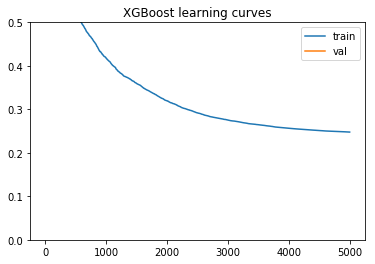

In [755]:
train_error = evals_result['train']['rmsle']
val_error = evals_result['eval']['rmsle']
df_error = pd.DataFrame([train_error, val_error]).T
df_error.columns = ['train', 'val']

df_error.plot(title="XGBoost learning curves", ylim=(0,.5))

In [756]:
preds = bst.predict(dtest, ntree_limit = bst.best_ntree_limit)
labels = dtest.get_label()
rmsle(preds, y_test)

1.9891791835644386

**Baseline Test: 0.44**

In [86]:
dtest_final = xgb.DMatrix(df_test)

preds = bst.predict(dtest_final)

In [87]:
preds = pd.Series(preds)

In [88]:
dt = pd.Series(datetime_test)

In [89]:
submission = pd.concat([dt, preds], axis=1)
submission = submission.rename(index=str, columns={"datetime": "datetime", 0: "count"})

In [91]:
submission.to_csv(r'Submissions/submission2.csv', index=False)